# Example on the MNIST Digits Dataset

### 1. Import of the modules and the dataset

In [1]:
from neural_network import *
from utils import *
from keras.datasets import mnist

2023-09-08 12:21:06.068275: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Load the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 3. Build the neural network

In [3]:
net = NeuralNetwork(
    Normalization(samples=X_train),
    Reshape(output_shape=(1, 28, 28)),
    Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
    BatchNorm2d(6),
    Tanh(),
    AvgPool2d(kernel_size=(2, 2), stride=(2, 2)),
    Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    BatchNorm2d(16),
    Tanh(),
    AvgPool2d(kernel_size=(2, 2), stride=(2, 2)),
    Flatten(),
    Linear(in_features=400, out_features=120),
    Tanh(),
    Linear(in_features=120, out_features=84),
    Tanh(),
    Linear(in_features=84, out_features=10),
    SoftmaxCategoricalCrossEntropy()
)
print(net)

NeuralNetwork:
 (0) Normalization(norm=255.0, dtype=float32)
 (1) Reshape(output_shape=(1, 28, 28))
 (2) Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), initialization=xavier)
 (3) BatchNorm2d(6, eps=1e-05, momentum=0.1)
 (4) Tanh()
 (5) AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
 (6) Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0), optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), initialization=xavier)
 (7) BatchNorm2d(16, eps=1e-05, momentum=0.1)
 (8) Tanh()
 (9) AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
 (10) Flatten()
 (11) Linear(in_features=400, out_features=120, optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), initialization=xavier)
 (12) Tanh()
 (13) Linear(in_features=120, out_features=84, optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), ini

### 4. Choose the number of samples to train on

In [4]:
# Select N samples to train on:
N = 3000
X_train, y_train = X_train[:N], y_train[:N]
X_train.shape, y_train.shape

((3000, 28, 28), (3000,))

### 5. Train the neural network

In [5]:
net.fit(X_train, y_train, epochs=5, batch_size=64, shuffle=True)

Training on 3000 samples:
Epoch    1 of 5    	 Average Error = 0.723556 	 Average Accuracy = 80.20%                                   
Epoch    2 of 5    	 Average Error = 0.288318 	 Average Accuracy = 91.87%                                   
Epoch    3 of 5    	 Average Error = 0.203518 	 Average Accuracy = 94.63%                                   
Epoch    4 of 5    	 Average Error = 0.146627 	 Average Accuracy = 96.33%                                   
Epoch    5 of 5    	 Average Error = 0.116919 	 Average Accuracy = 97.03%                                   
Training time : 00 hours, 00 minutes, 28 seconds


### 6. Make predictions on the test samples

In [6]:
# Prediction on the 10,000 test samples:
y_pred = net.predict(X_test, to="labels")
# Shows the first 10 predicted labels vs the true labels:
y_pred[:10], y_test[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

### 7. Evaluate the accuracy score

In [7]:
print(f"Accuracy score on the test set: {accuracy_score(y_test, y_pred):.2%}")

Accuracy score on the test set: 95.21%


### 8. Build a confusion matrix

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{cm}")

Confusion matrix:
[[ 960    1    1    0    1    0   10    3    4    0]
 [   0 1123    3    3    0    1    2    3    0    0]
 [   7    2  960    5   12    0    4   31    9    2]
 [   5    0   17  949    0   11    0   16    5    7]
 [   1    1    0    0  963    0    1    3    0   13]
 [  10    1    0   16    0  835    6    7    9    8]
 [  10    6    3    0   15    8  913    0    3    0]
 [   2    2   22    3    1    0    0  986    2   10]
 [   7    7    6   13    8    3    4   19  896   11]
 [  11    5    1    8   21    0    0   27    0  936]]


### 9. Displays a classification report

In [11]:
print(classification_report(cm, formatted=True))

┌───────────────────┬───────────┬───────────┬───────────┬───────────┐
│       Class       │ Precision │   Recall  │  F1-Score │  Support  │
├───────────────────┼───────────┼───────────┼───────────┼───────────┤
│         0         │  94.77%   │  97.96%   │  96.34%   │    980    │
│         1         │  97.82%   │  98.94%   │  98.38%   │   1135    │
│         2         │  94.77%   │  93.02%   │  93.89%   │   1032    │
│         3         │  95.19%   │  93.96%   │  94.57%   │   1010    │
│         4         │  94.32%   │  98.07%   │  96.16%   │    982    │
│         5         │  97.32%   │  93.61%   │  95.43%   │    892    │
│         6         │  97.13%   │  95.30%   │  96.21%   │    958    │
│         7         │  90.05%   │  95.91%   │  92.89%   │   1028    │
│         8         │  96.55%   │  91.99%   │  94.22%   │    974    │
│         9         │  94.83%   │  92.77%   │  93.79%   │   1009    │
└───────────────────┴───────────┴───────────┴───────────┴───────────┘


### 9. Displays some of the misclassified samples

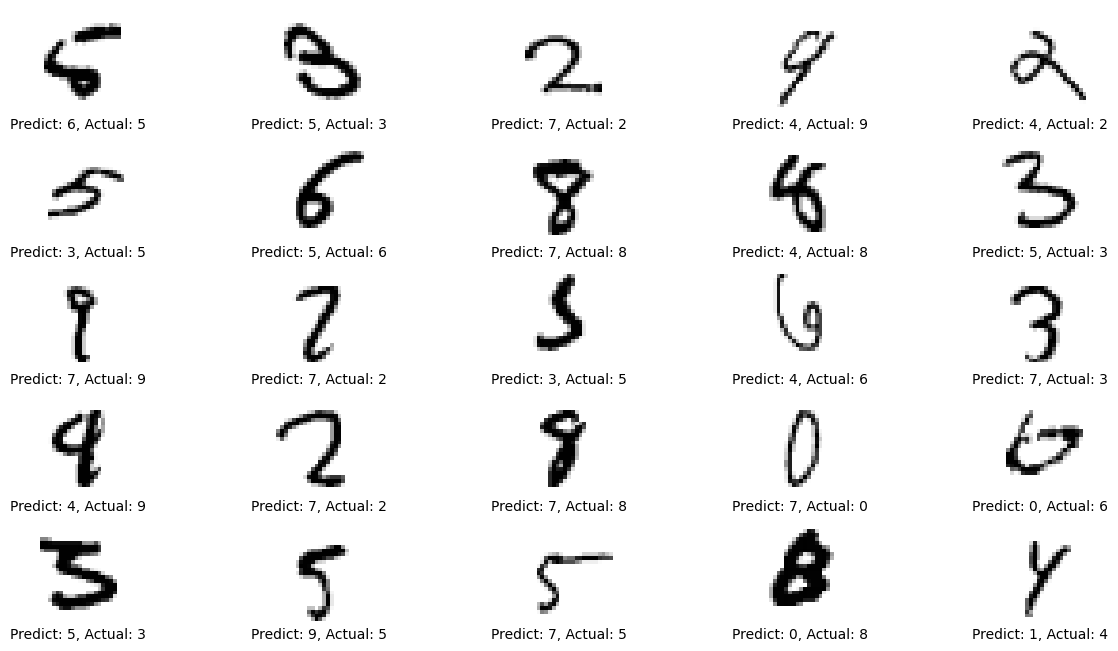

In [10]:
display_misclassified(X_test, y_test, y_pred)